#**Polynomial Regression**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/polynomial_regression_train.csv', delimiter = ',')       # reading train set
df = df.drop(columns = ['ID'])
print(df.shape)

(48000, 6)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df.iloc[:38400])

print()
print()

print('CROSS VALIDATION SET')
print(df.iloc[38400:43200])

print()
print()

print('TEST SET')
print(df.iloc[43200:])

TRAIN SET
       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5        Target
0      -0.299150   0.980381  -1.244780   0.420551  -0.352235  8.168743e-10
1      -0.374319  -1.179867   0.615588   0.054701   0.687182 -5.081225e-10
2      -1.240429  -0.139086  -0.001653   0.487685  -0.242808  4.560170e-10
3      -0.429881  -1.724246  -0.098046   0.896504   0.318585 -2.647546e-09
4      -1.726345   1.945823   1.275979  -0.474670   1.050494 -1.704606e-08
...          ...        ...        ...        ...        ...           ...
38395  -1.780298   0.789074   1.836974   0.635035  -0.898438  2.841134e-09
38396   1.518666  -0.342428  -0.470679  -1.516885   1.751274  4.260432e-09
38397   0.976950   0.876055  -0.224114  -0.497490  -0.429229  7.715401e-10
38398  -0.036663  -1.153338   1.764574   0.168631   0.238403  4.673380e-10
38399  -1.145309  -0.740983  -1.187143   0.505689   1.196541 -6.555213e-11

[38400 rows x 6 columns]


CROSS VALIDATION SET
       Feature_1  Feature_2  Feature_3  F

`Feature Engineering`

In [ ]:
df['Feature_6'] = df['Feature_1'] ** 2                                        #squares
df['Feature_7'] = df['Feature_2'] ** 2
df['Feature_8'] = df['Feature_3'] ** 2
df['Feature_9'] = df['Feature_4'] ** 2
df['Feature_10'] = df['Feature_5'] ** 2

df['Feature_11'] = df['Feature_1'] * df['Feature_3']                           #interaction terms
df['Feature_12'] = df['Feature_3'] * df['Feature_4']
df['Feature_13'] = df['Feature_1'] * df['Feature_4']

df['Feature_14'] = df['Feature_1'] ** 4                                        #fourthpower
df['Feature_15'] = df['Feature_2'] ** 4
df['Feature_16'] = df['Feature_3'] ** 4
df['Feature_17'] = df['Feature_4'] ** 4
df['Feature_18'] = df['Feature_5'] ** 4

df['Feature_19'] = df['Feature_1'] ** 6                                        #sixthpower
df['Feature_20'] = df['Feature_2'] ** 6
df['Feature_21'] = df['Feature_3'] ** 6
df['Feature_22'] = df['Feature_4'] ** 6
df['Feature_23'] = df['Feature_5'] ** 6

df = df[[col for col in df.columns if col != 'Target'] + ['Target']]          #reordering the columns

print(df)

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0      -0.299150   0.980381  -1.244780   0.420551  -0.352235   0.089491   
1      -0.374319  -1.179867   0.615588   0.054701   0.687182   0.140115   
2      -1.240429  -0.139086  -0.001653   0.487685  -0.242808   1.538665   
3      -0.429881  -1.724246  -0.098046   0.896504   0.318585   0.184798   
4      -1.726345   1.945823   1.275979  -0.474670   1.050494   2.980267   
...          ...        ...        ...        ...        ...        ...   
47995   1.125337   0.229907  -1.789732  -0.571275  -1.900555   1.266384   
47996   1.733309  -0.721866   0.958440   0.317420   0.108628   3.004359   
47997  -1.677538   1.758274   1.020534   0.346496   1.313755   2.814135   
47998   1.313345   0.315358  -0.060629   0.703251  -0.618520   1.724874   
47999  -0.999870  -1.657458  -0.812632   1.018717  -1.236993   0.999739   

       Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_15  \
0       0.961148   1.549478 

In [ ]:
df_train = df.iloc[:38400]
df_cv = df.iloc[38400:43200]
df_test = df.iloc[43200:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_23']

x_train = features_train.to_numpy()
y_train = df_train['Target'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[-2.99150217e-01  9.80381374e-01 -1.24478036e+00 ...  3.72011493e+00
   5.53241525e-03  1.90981575e-03]
 [-3.74319425e-01 -1.17986704e+00  6.15588148e-01 ...  5.44178648e-02
   2.67902726e-08  1.05300763e-01]
 [-1.24042933e+00 -1.39085810e-01 -1.65302067e-03 ...  2.04018575e-17
   1.34535516e-02  2.04917245e-04]
 ...
 [ 9.76950462e-01  8.76054782e-01 -2.24114101e-01 ...  1.26711228e-04
   1.51602420e-02  6.25367736e-03]
 [-3.66634026e-02 -1.15333804e+00  1.76457421e+00 ...  3.01883632e+01
   2.29945797e-05  1.83598713e-04]
 [-1.14530852e+00 -7.40982621e-01 -1.18714301e+00 ...  2.79909890e+00
   1.67225455e-02  2.93471766e+00]]

y_train = [ 8.16874285e-10 -5.08122456e-10  4.56017046e-10 ...  7.71540057e-10
  4.67338029e-10 -6.55521344e-11]


`Normalising x_train`

In [ ]:
mean_train = x_train.mean(axis=0)
std_train = x_train.std(axis=0)

x_train = (x_train - mean_train) / std_train

print(f"x_train = {x_train}")

x_train = [[-0.27021573  0.85170907 -1.0819715  ... -0.35415992 -0.60048071
  -0.59664579]
 [-0.3351768  -1.02233467  0.53165123 ... -0.59470476 -0.60084546
  -0.58979684]
 [-1.08366711 -0.11944334 -0.00372355 ... -0.59827569 -0.59995847
  -0.59675873]
 ...
 [ 0.83258773  0.76120439 -0.19667901 ... -0.59826738 -0.59984595
  -0.59635804]
 [-0.04337519 -0.99932041  1.52824412 ...  1.38269954 -0.60084395
  -0.59676014]
 [-1.00146391 -0.64159669 -1.03197876 ... -0.41459745 -0.59974295
  -0.40236714]]


## **3. Visualising the Data**

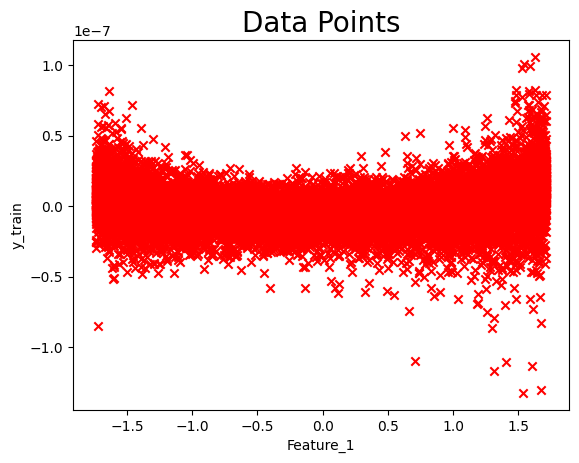

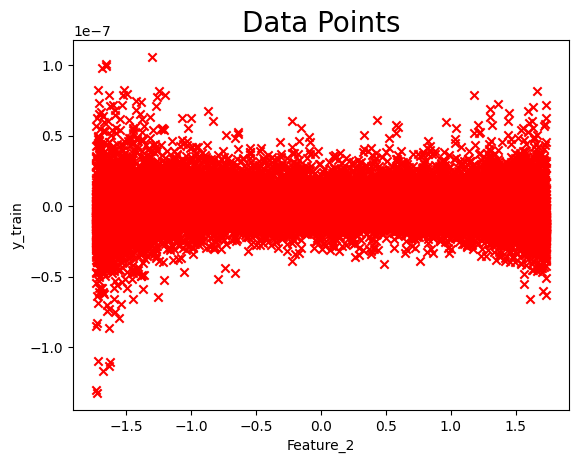

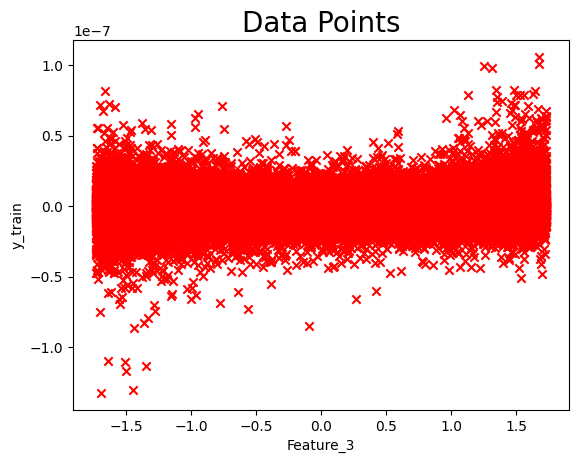

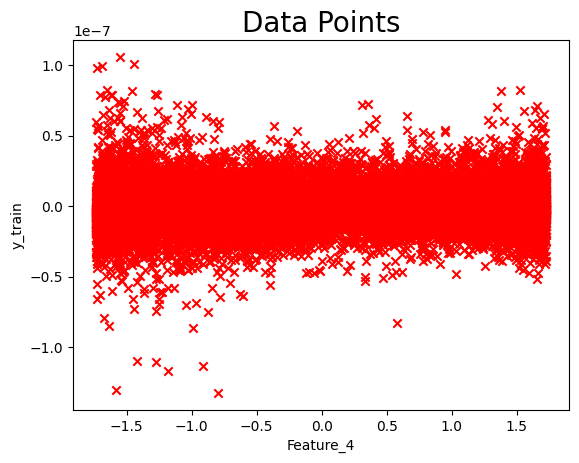

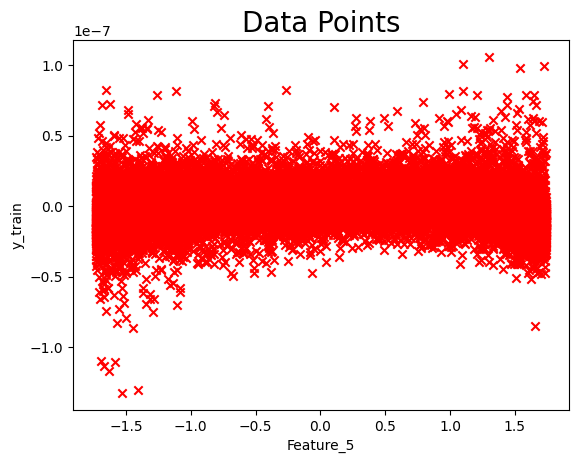

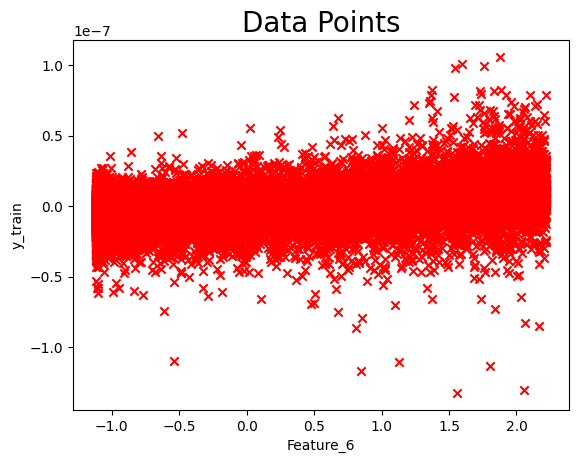

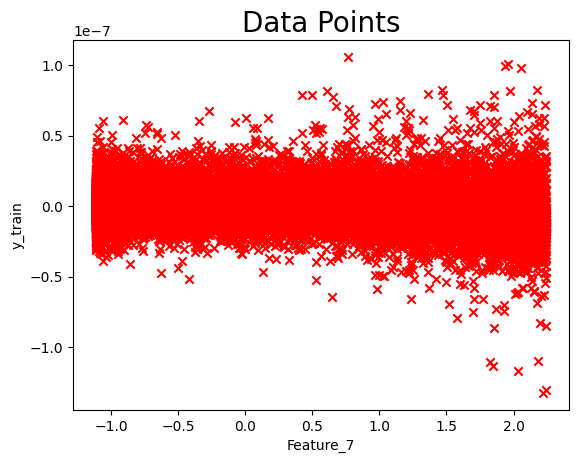

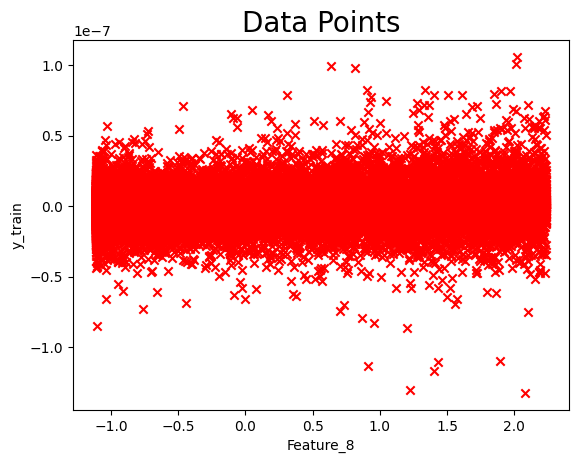

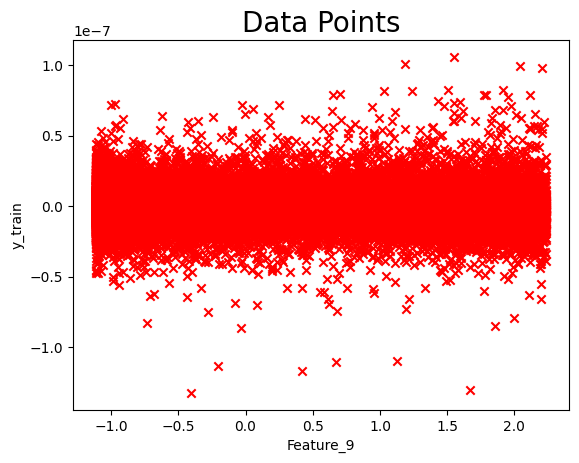

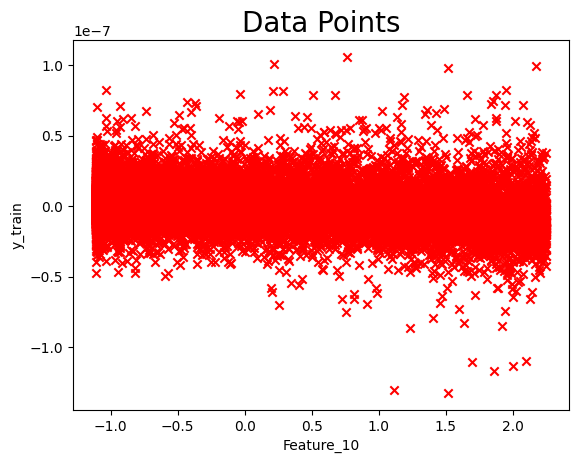

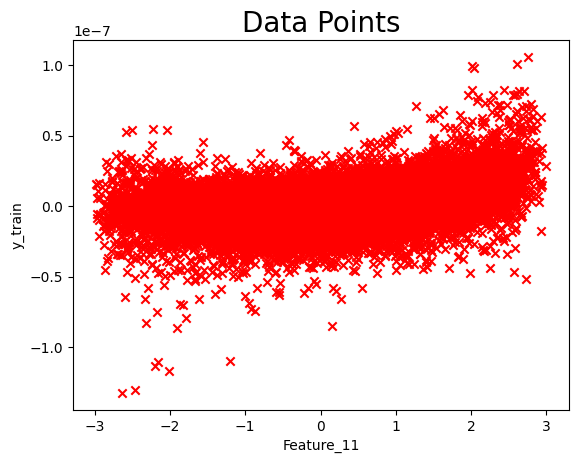

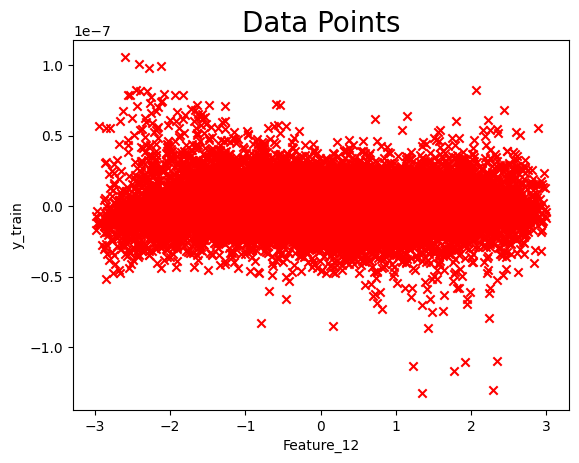

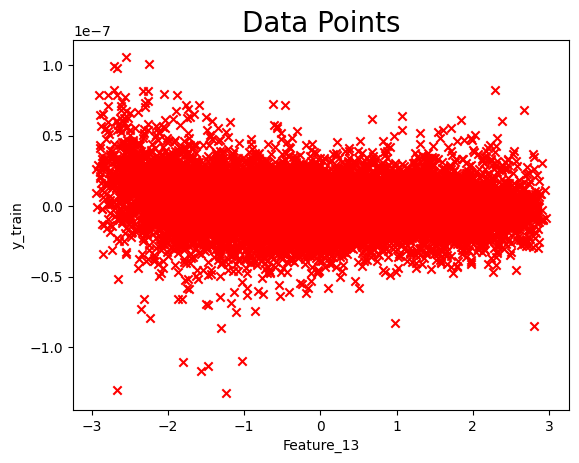

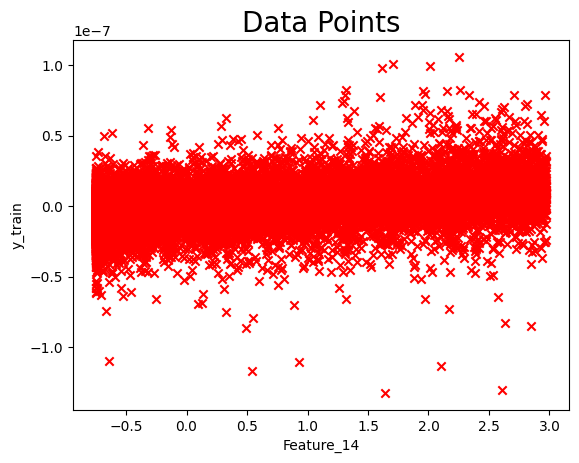

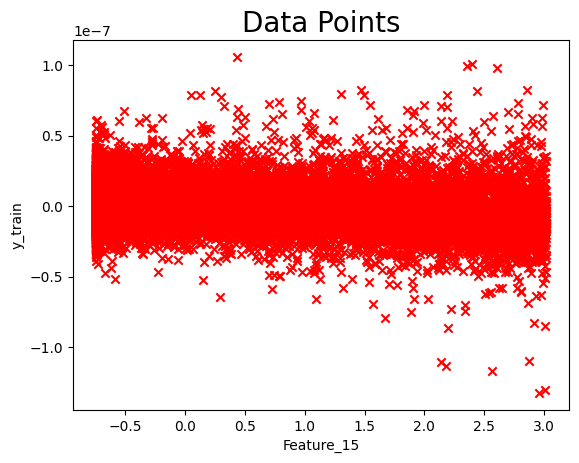

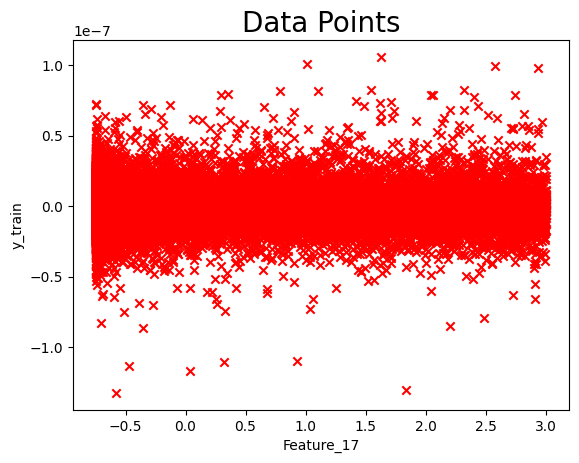

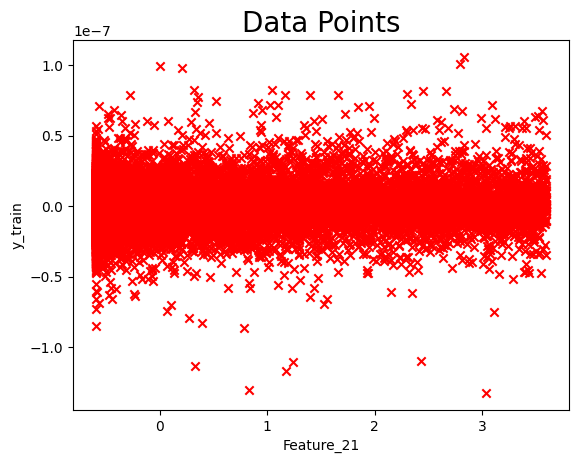

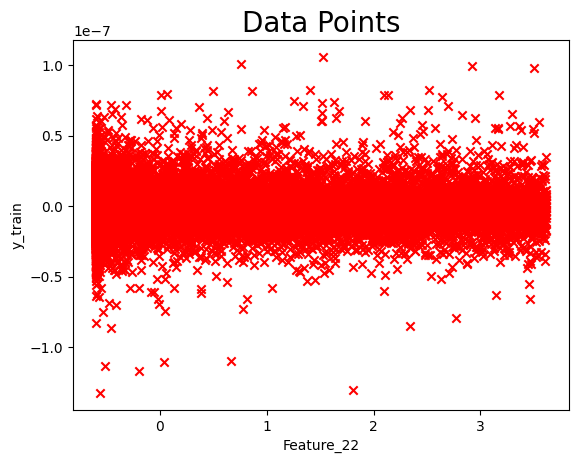

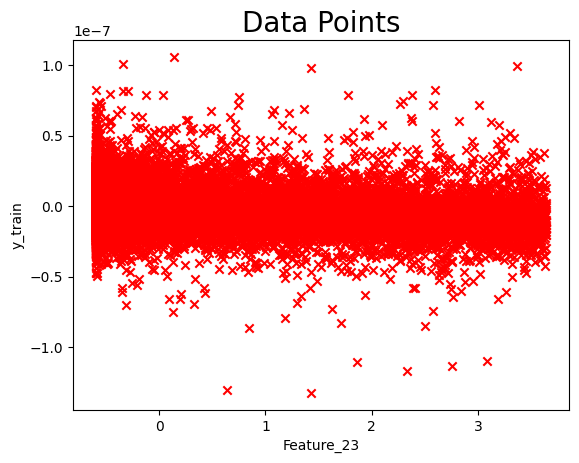

In [ ]:
for i in range(x_train.shape[1]):
  plt.scatter(x_train[:, i], y_train, marker='x', c='r')

  plt.title('Data Points', fontdict = {'fontsize' : 20})
  plt.ylabel('y_train')
  plt.xlabel('Feature_' + str(i + 1))                      # +1 because index will start from 0

  plt.show()

##**4. Model Initialization**

## **Defining Cost Function**

In [ ]:
def cost_function(x, y, a, b):
  m = x.shape[0]
  J_ab = 0

  f_ab = np.dot(x, a) + b
  J_ab += np.sum((f_ab - y) ** 2)

  J_ab = J_ab / (2 * m)
  return J_ab                            # cost function

## **5. Defining Gradient Descent**

`Defining Gradient`

In [ ]:
def gradient(x_train, y_train, a, b):
  m = x_train.shape[0]
  n = x_train.shape[1]

  f_ab = np.dot(x_train, a) + b
  dJ_da = (1 / m) * np.dot(x_train.T, (f_ab - y_train))
  dJ_db = (1 / m) * np.sum((f_ab - y_train))

  return dJ_da, dJ_db                                     # gradients

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, a, b, alpha, num_iters, cost_function, gradient):

  J_history = []

  for i in range(num_iters):
    dJ_da, dJ_db = gradient(x_train, y_train, a, b)

    a_temp = a - (alpha) * dJ_da
    b_temp = b - (alpha) * dJ_db
    a = a_temp
    b = b_temp

    if i < 100000:
      J_history.append( cost_function(x_train, y_train, a, b))        # storing cost with every iteration for
                                                                      # plotting later.

    if i % (num_iters/10) <= 0.01:
      print(f"Iteration {i:6}: Cost {J_history[-1] : .4e} ")

  return a, b, J_history

In [ ]:
n = x_train.shape[1]
a_int = np.zeros(n)           # initial value of a
b_int = 0                     # initial value of b

iterations = 2000
tmp_alpha = 0.5              # learning rate

%time

a_final, b_final, J_hist = gradient_descent(x_train ,y_train, a_int, b_int, tmp_alpha,
                                                    iterations, cost_function, gradient)

print(f"TRAIN COST estimated is ={J_hist[-1] : .4e}")

Iteration      0: Cost  3.8267e-17 
Iteration    200: Cost  3.2599e-17 
Iteration    400: Cost  3.2597e-17 
Iteration    600: Cost  3.2595e-17 
Iteration    800: Cost  3.2593e-17 
Iteration   1000: Cost  3.2592e-17 
Iteration   1200: Cost  3.2592e-17 
Iteration   1400: Cost  3.2591e-17 
Iteration   1600: Cost  3.2591e-17 
Iteration   1800: Cost  3.2590e-17 
TRAIN COST estimated is = 3.2590e-17
Total time for gradient descent: 2.7253 seconds


## **6. Learning Curve**

`Learning Curve`

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()




`Learned Parameters`



In [ ]:
print(f'a_final = {a_final}')
print()
print(f"b_final = {b_final}")

a_final = [ 1.20602214e-09  1.08887799e-10  1.37153674e-09  8.13142169e-10
  1.25004153e-10  8.78385695e-10  9.28838372e-10  5.52015680e-10
 -4.61458054e-10  7.59066931e-10  3.73239169e-09 -2.53037933e-11
 -1.71139952e-09 -1.99513951e-10 -1.83846431e-11  2.95854511e-11
  2.78958409e-10 -2.65085982e-09  3.29779081e-09 -3.11550395e-09
  1.98619615e-10 -1.90034378e-10 -6.10805373e-10]

b_final = -3.065661348558426e-10


`Visualising Feature Impacts (only required ones)`

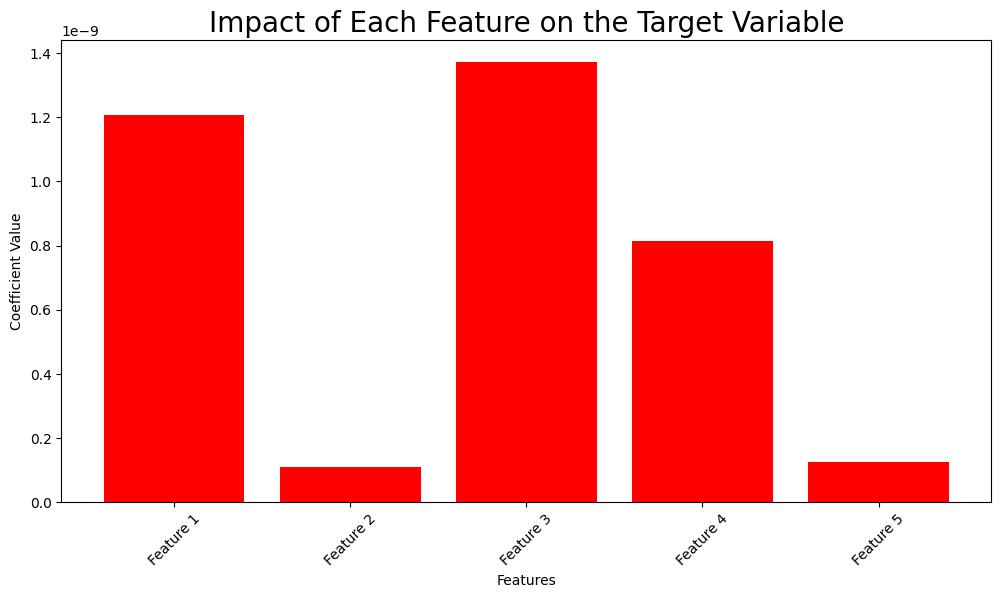

In [ ]:
features = [f'Feature {i + 1}' for i in range(5)]
plt.figure(figsize=(12, 6))

plt.bar(range(5), a_final[0:5], color = 'r')

plt.title("Impact of Each Feature on the Target Variable", fontdict={'fontsize': 20})
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

plt.xticks(range(5), features, rotation=45)

plt.show()

##**7. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.loc[:, 'Feature_1':'Feature_23']

x_cv = features_cv.to_numpy()
y_cv = df_cv['Target'].to_numpy()


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean_train) / std_train

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[-0.12937628  1.03033656  1.11671816 ... -0.29570955  1.30000059
  -0.58648394]
 [ 1.55233887 -1.64749012 -0.42960498 ... -0.59733746  0.43737654
  -0.56122567]
 [-0.96735574  1.62303799  0.20525275 ... -0.59826338 -0.60084496
  -0.5967723 ]
 ...
 [ 1.70038982 -0.16224082 -0.06707783 ... -0.59827568  1.00707384
   3.13062444]
 [ 0.52196299  1.1508493  -1.48146698 ...  1.01586937 -0.591376
  -0.57258607]
 [ 1.53605624  1.38092306 -1.03540286 ... -0.41090205 -0.43306146
   0.53142958]]
y_cv = [ 8.31750199e-09  3.18125430e-09 -3.61736046e-09 ... -1.47363028e-08
 -1.21203705e-09 -8.23107578e-09]


In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

4800


`Computing Cross Validation Cost`

In [ ]:
Cross_Validation_Cost = cost_function(x_cv, y_cv, a_final, b_final)

print(f"Cross Validation Cost ={Cross_Validation_Cost: .4e}")

Cross Validation Cost = 3.5212e-17


##**8. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_23']

x_test = features_test.to_numpy()
y_test = df_test['Target'].to_numpy()

`Same Normalization`

In [ ]:
x_test = (x_test - mean_train) / std_train

print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[-1.38632871 -0.76762821  0.04102851 ... -0.59827569 -0.52500109
  -0.5764865 ]
 [-0.53332298 -1.39483494  1.4935872  ...  1.12834364  1.01942835
  -0.59452076]
 [-1.70591425 -0.65636522  1.04060506 ... -0.40000231 -0.60081035
   0.08697573]
 ...
 [-1.46141581  1.5265414   0.88288841 ... -0.52414372 -0.60073137
  -0.25618604]
 [ 1.12329887  0.27479264 -0.0548775  ... -0.59827569 -0.59287018
  -0.59306325]
 [-0.87577589 -1.43665132 -0.7071404  ... -0.57937821 -0.52715615
  -0.3594468 ]]
y_test = [ 7.87756054e-10 -4.81036638e-09  8.04168429e-09 ... -1.09620443e-08
  1.96209742e-09  5.00055158e-10]


In [ ]:
m_test = x_test.shape[0]
print(m_test)

4800


`Computing Test Cost`

In [ ]:
Test_Cost = cost_function(x_test, y_test, a_final, b_final)

print(f"Test Cost = {Test_Cost:.4e}")

Test Cost = 2.9931e-17


##**8. Estimating R - squared(R2)**

In [ ]:
sst = np.sum((y_test - np.mean(y_test))**2)                               # Total sum of squares
sse = np.sum((y_test - (np.dot(x_test, a_final) + b_final))**2)           # Sum of squared errors
r2 = 1 - (sse / sst)

print(f'R2 score = {r2}')

R2 score = 0.42305540328005464


## **10. Final Model**

In [ ]:
def Polynomial_regression(x, a_final, b_final):
  f_ab = np.dot(x, a_final[:5]) + np.dot(x ** 2, a_final[5:10]) + np.dot(x[0]*x[2], a_final[10]) + np.dot(x[2]*x[3], a_final[11]) + np.dot(x[0]*x[3], a_final[12]) + np.dot(x ** 4, a_final[13:18]) + np.dot(x ** 6, a_final[18:23]) + b_final
  return f_ab

## **11. Visualising Final Model**

`Individual Features Plots (just for visualisation and have limited physical significance)`

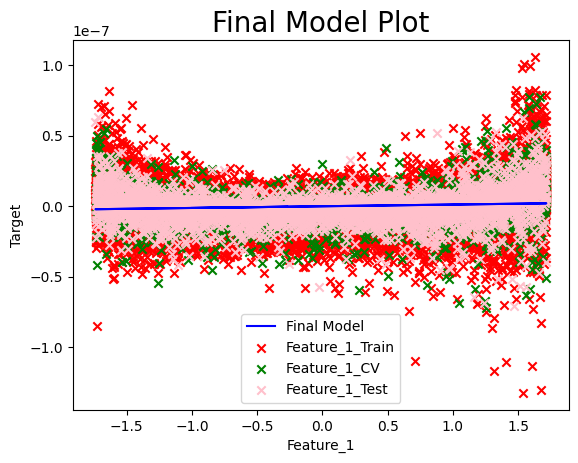

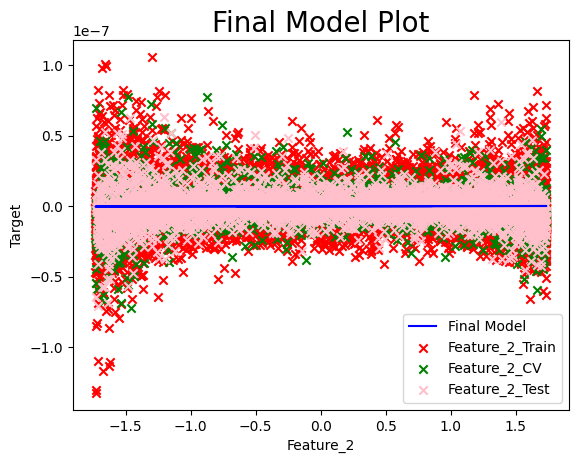

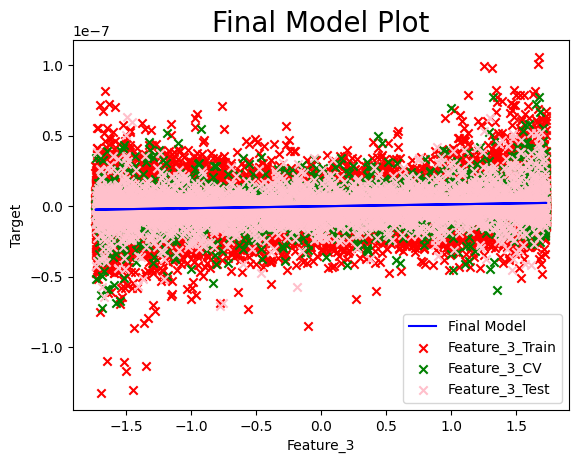

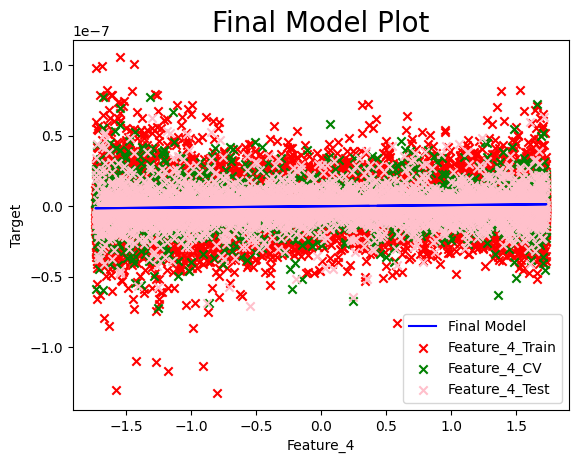

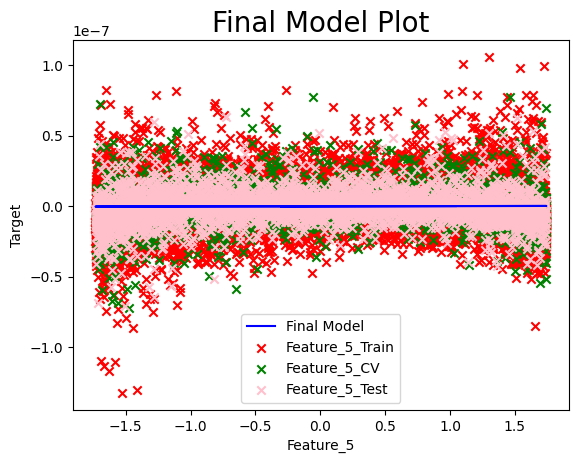

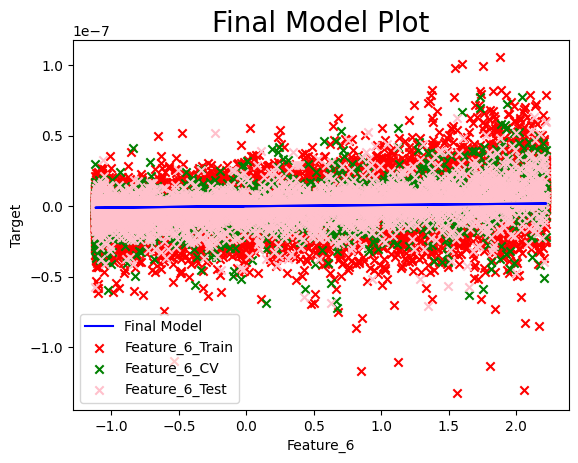

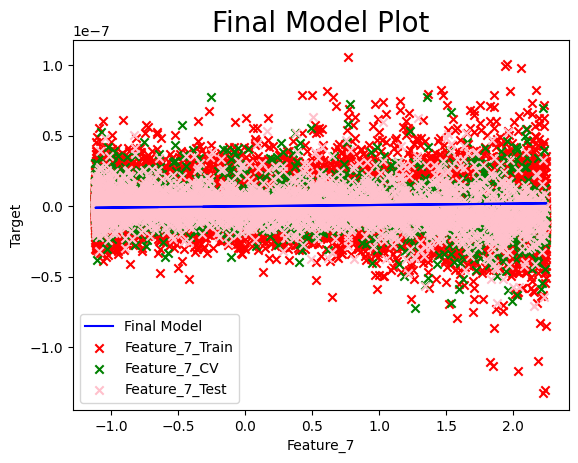

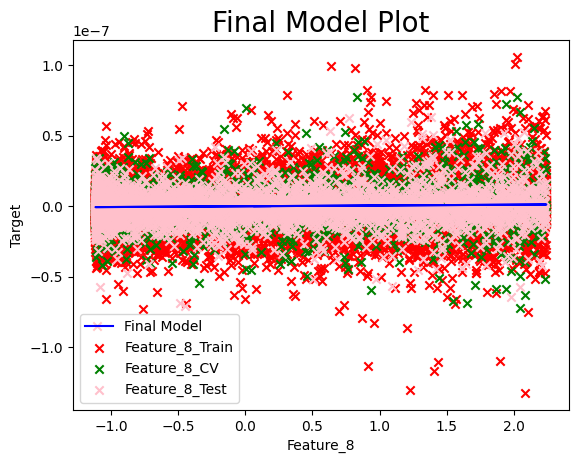

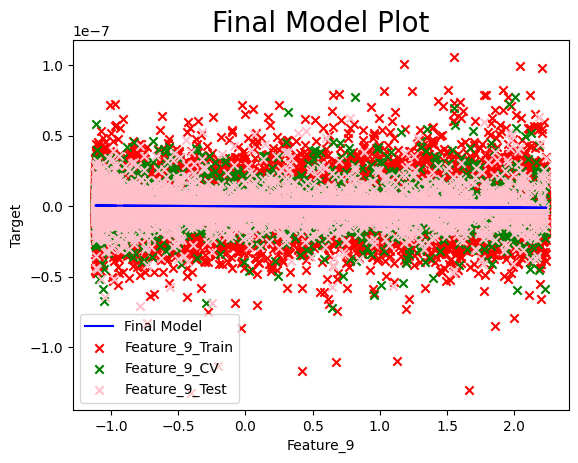

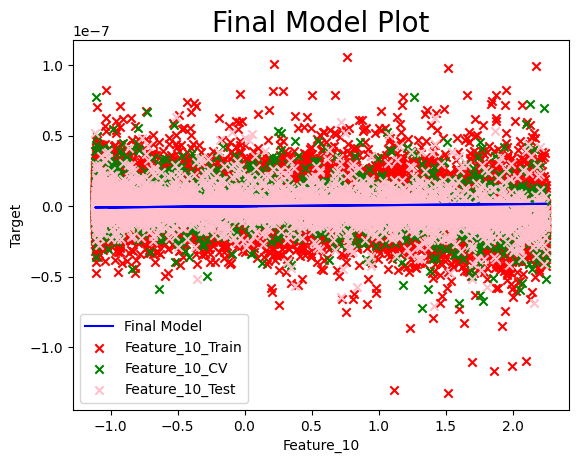

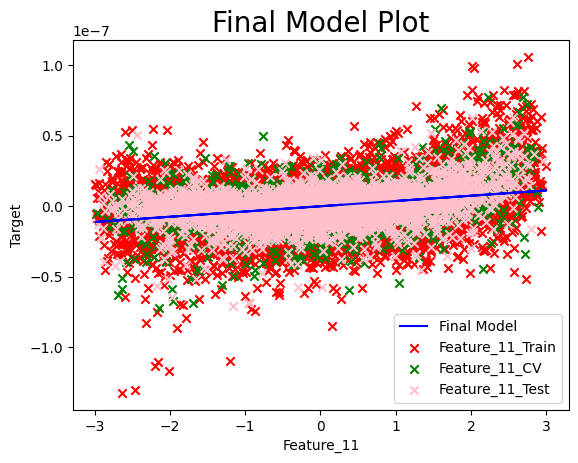

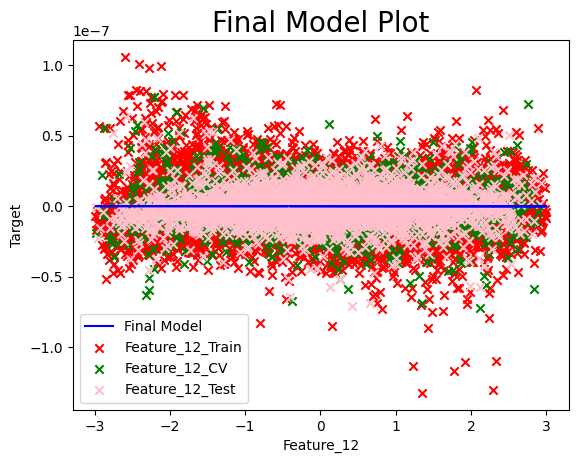

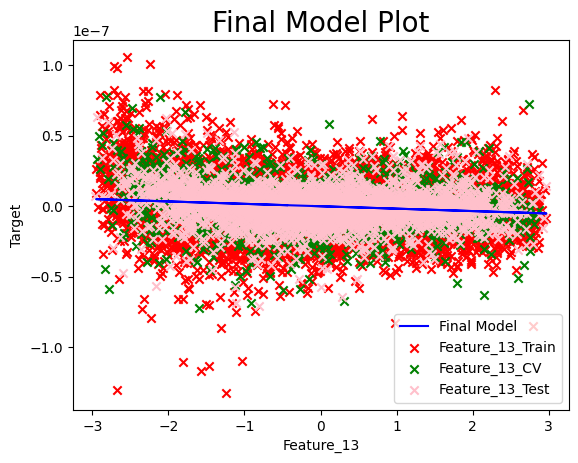

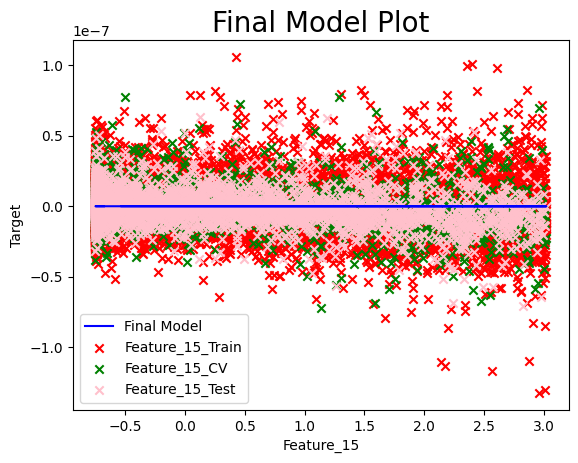

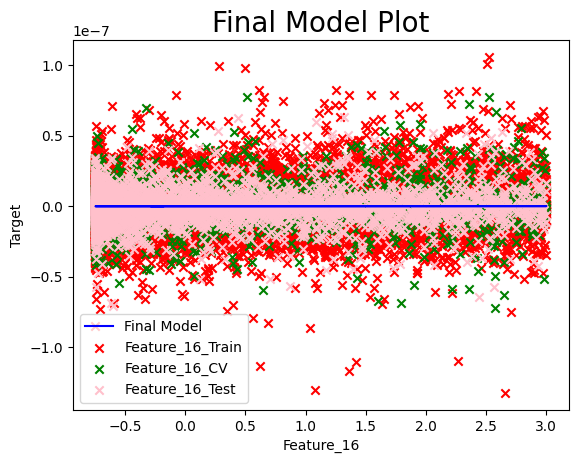

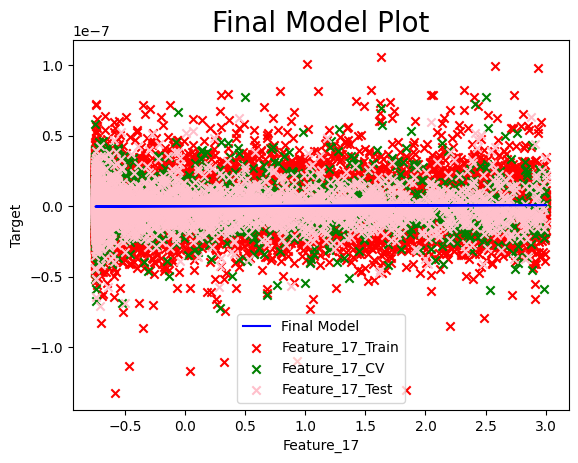

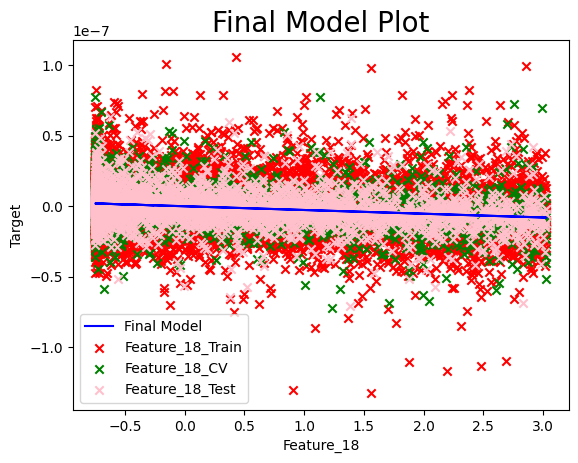

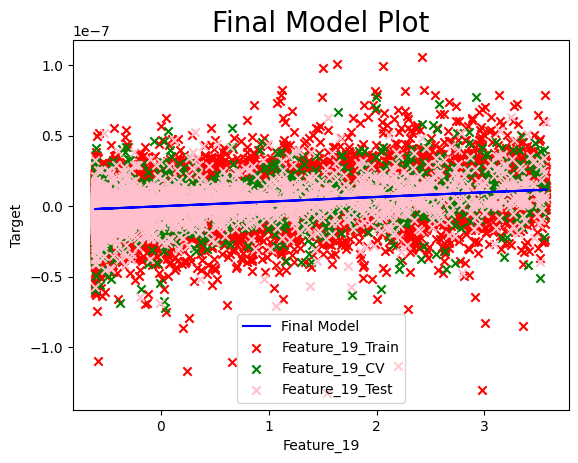

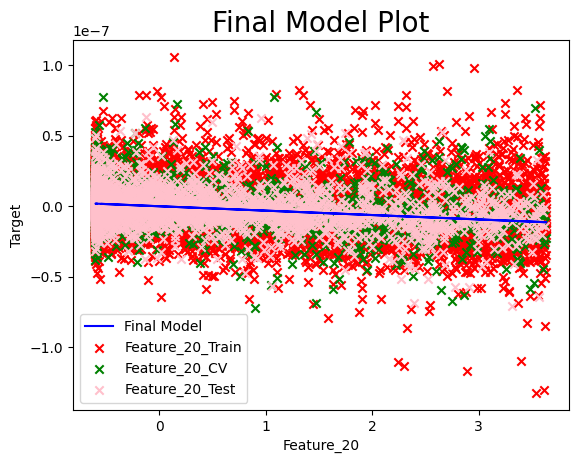

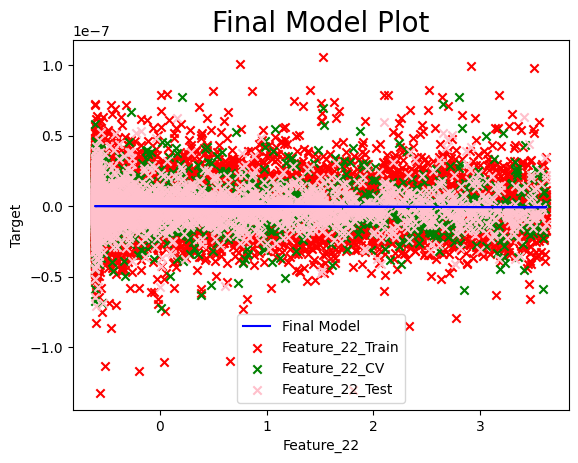

In [ ]:
n = x_train.shape[1]
for i in range(n):

  plt.plot(x_train[:, i], (np.dot(x_train[:, i], a_final[i]) + (b_final/n)), 'b-', label = 'Final Model')   # Final Model

  plt.scatter(x_train[:, i], y_train, marker='x', c='r', label = f'Feature_{i + 1}_Train')                  # Train Set

  plt.scatter(x_cv[:, i], y_cv, marker='x', c='g', label = f'Feature_{i + 1}_CV')                           # CV Set

  plt.scatter(x_test[:, i], y_test, marker='x', c='pink', label = f'Feature_{i + 1}_Test')                  # Test Set


  plt.title('Final Model Plot', fontdict = {'fontsize' : 20})
  plt.ylabel('Target')
  plt.xlabel('Feature_' + str(i + 1))
  plt.legend()
  plt.show()

`Visualising Feature Impacts`

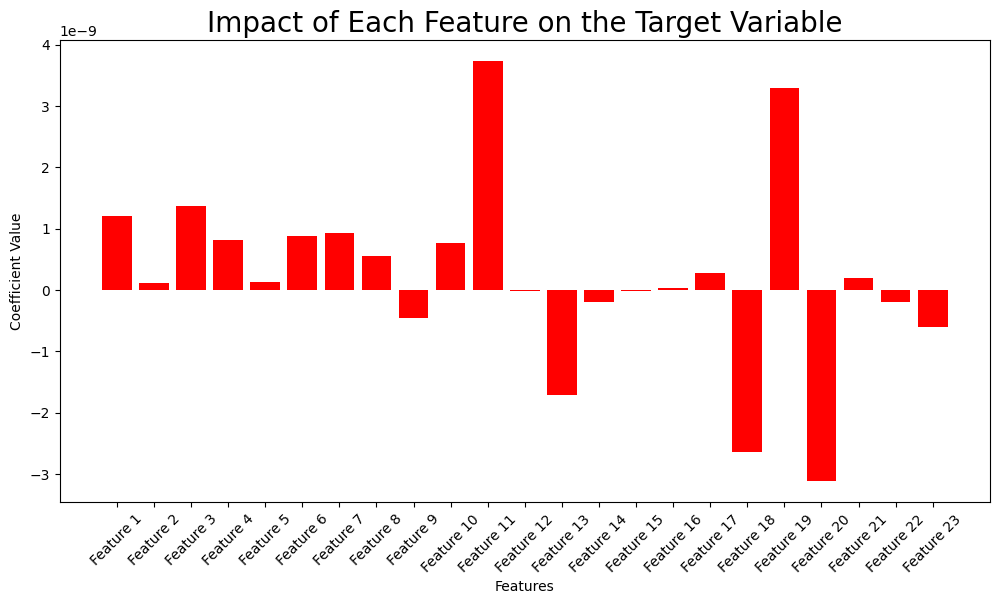

In [ ]:
features = [f'Feature {i + 1}' for i in range(n)]
plt.figure(figsize=(12, 6))

plt.bar(range(n), a_final[0:n], color = 'r')

plt.title("Impact of Each Feature on the Target Variable", fontdict={'fontsize': 20})
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

plt.xticks(range(n), features, rotation=45)

plt.show()

## **12. Prediction For Test Set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/polynomial_regression_test.csv', delimiter = ',')        # reading test set
df_test = df_test.drop(columns = ['ID'])
print(df_test.shape)
print(df_test)

(12000, 5)
       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0       1.718004  -0.201814   0.791965  -0.410485   1.678171
1       0.782395   0.897345  -0.059263  -1.725306  -1.363520
2       0.619033   0.397670  -0.506356  -0.546682  -1.629186
3       1.950046  -1.874789  -0.144491   1.952435   1.908823
4       0.097417   0.960511  -1.031956  -1.585839  -1.297509
...          ...        ...        ...        ...        ...
11995   1.264677  -0.975995  -1.522923  -0.894496   1.166645
11996  -1.134109   1.309373   1.057666  -1.103589   0.368445
11997  -1.557074  -1.065746   1.440004   0.392618  -0.867881
11998  -0.750905   0.354496  -0.893223   0.960500  -1.309842
11999   0.052107   0.073239  -0.593130   0.258087   1.730319

[12000 rows x 5 columns]


`Test Set`

In [ ]:
df_test['Feature_6'] = df_test['Feature_1'] ** 2                                         #squares
df_test['Feature_7'] = df_test['Feature_2'] ** 2
df_test['Feature_8'] = df_test['Feature_3'] ** 2
df_test['Feature_9'] = df_test['Feature_4'] ** 2
df_test['Feature_10'] = df_test['Feature_5'] ** 2

df_test['Feature_11'] = df_test['Feature_1'] * df_test['Feature_3']                      #interaction terms
df_test['Feature_12'] = df_test['Feature_3'] * df_test['Feature_4']
df_test['Feature_13'] = df_test['Feature_1'] * df_test['Feature_4']

df_test['Feature_14'] = df_test['Feature_1'] ** 4                                        #fourthpower
df_test['Feature_15'] = df_test['Feature_2'] ** 4
df_test['Feature_16'] = df_test['Feature_3'] ** 4
df_test['Feature_17'] = df_test['Feature_4'] ** 4
df_test['Feature_18'] = df_test['Feature_5'] ** 4

df_test['Feature_19'] = df_test['Feature_1'] ** 6                                        #sixthpower
df_test['Feature_20'] = df_test['Feature_2'] ** 6
df_test['Feature_21'] = df_test['Feature_3'] ** 6
df_test['Feature_22'] = df_test['Feature_4'] ** 6
df_test['Feature_23'] = df_test['Feature_5'] ** 6

print(df_test)

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       1.718004  -0.201814   0.791965  -0.410485   1.678171   2.951536   
1       0.782395   0.897345  -0.059263  -1.725306  -1.363520   0.612142   
2       0.619033   0.397670  -0.506356  -0.546682  -1.629186   0.383202   
3       1.950046  -1.874789  -0.144491   1.952435   1.908823   3.802680   
4       0.097417   0.960511  -1.031956  -1.585839  -1.297509   0.009490   
...          ...        ...        ...        ...        ...        ...   
11995   1.264677  -0.975995  -1.522923  -0.894496   1.166645   1.599408   
11996  -1.134109   1.309373   1.057666  -1.103589   0.368445   1.286204   
11997  -1.557074  -1.065746   1.440004   0.392618  -0.867881   2.424480   
11998  -0.750905   0.354496  -0.893223   0.960500  -1.309842   0.563859   
11999   0.052107   0.073239  -0.593130   0.258087   1.730319   0.002715   

       Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_14  \
0       0.040729   0.627209 

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_23']
x_test = features_test.to_numpy()


print(f"x_test = {x_test}")

x_test = [[ 1.71800361e+00 -2.01814139e-01  7.91965465e-01 ...  2.46738809e-01
   4.78391849e-03  2.23365977e+01]
 [ 7.82394876e-01  8.97345365e-01 -5.92633441e-02 ...  4.33228407e-08
   2.63752442e+01  6.42641140e+00]
 [ 6.19033080e-01  3.97669934e-01 -5.06355889e-01 ...  1.68552498e-02
   2.66936045e-02  1.86992143e+01]
 ...
 [-1.55707406e+00 -1.06574636e+00  1.44000410e+00 ...  8.91625264e+00
   3.66286042e-03  4.27328052e-01]
 [-7.50905451e-01  3.54496014e-01 -8.93223357e-01 ...  5.07879199e-01
   7.85208470e-01  5.05024744e+00]
 [ 5.21071799e-02  7.32387491e-02 -5.93130348e-01 ...  4.35412483e-02
   2.95526887e-04  2.68384196e+01]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean_train) / std_train

print(f"x_test = {x_test}")

x_test = [[ 1.47300427 -0.17386099  0.68463514 ... -0.58208457 -0.60053006
   0.88287593]
 [ 0.66445321  0.77967425 -0.05369286 ... -0.59827569  1.13807433
  -0.1710661 ]
 [ 0.5232763   0.34619928 -0.4414863  ... -0.59716964 -0.59908555
   0.64192393]
 ...
 [-1.35731081 -0.92333349  1.24672263 ... -0.01318681 -0.60060397
  -0.56846471]
 [-0.66062163  0.30874534 -0.77704247 ... -0.56494841 -0.54907667
  -0.26222763]
 [ 0.03334016  0.06475099 -0.51675162 ... -0.59541849 -0.60082598
   1.18109113]]


`Prediction for Test Set`

In [ ]:
prediction_test_set = np.dot(x_test, a_final) + b_final

print(prediction_test_set)

[ 9.68137768e-09 -1.22811927e-09 -5.14318815e-09 ... -2.08532848e-10
  4.69208231e-11 -6.17055318e-09]


`Visualing Predictions`

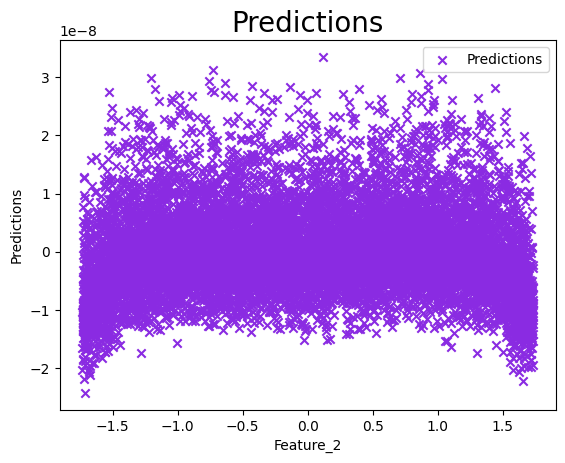

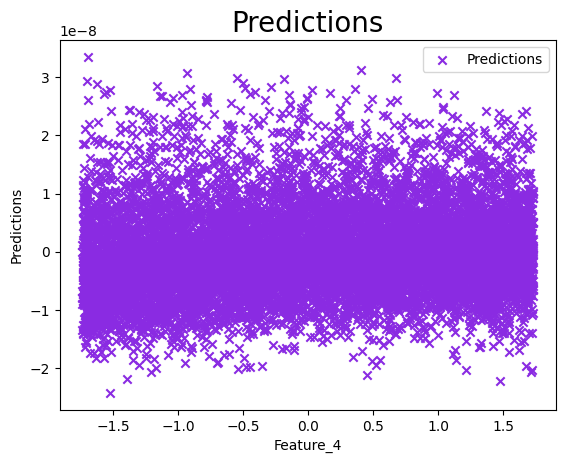

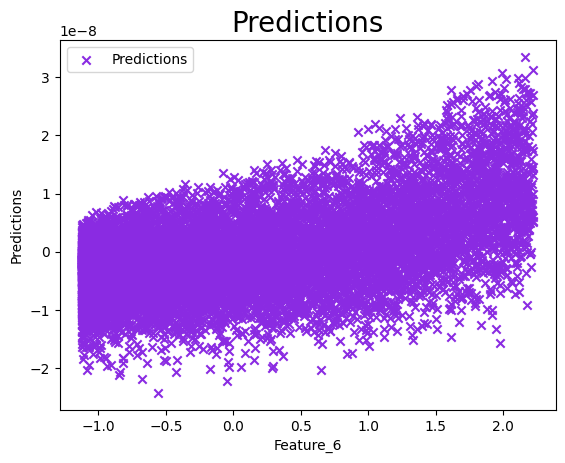

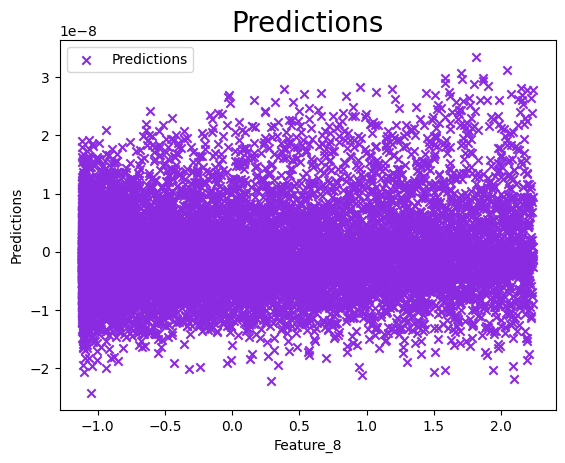

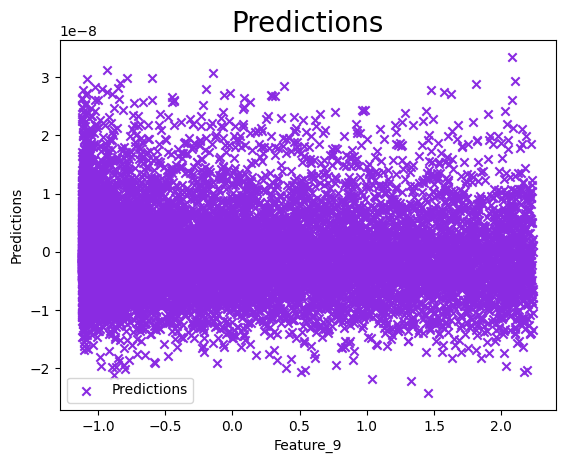

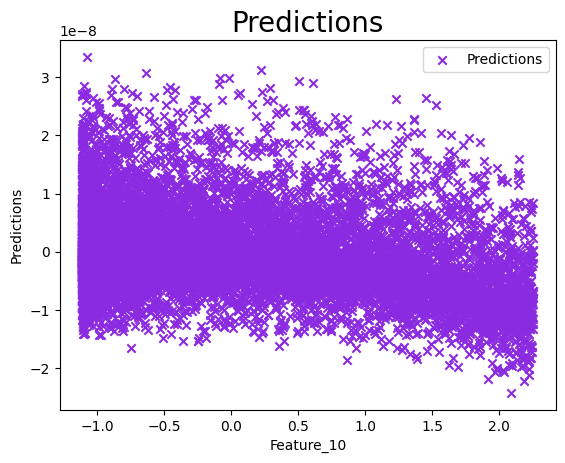

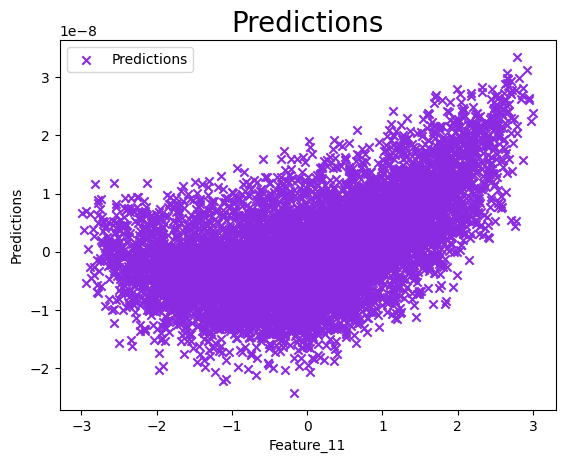

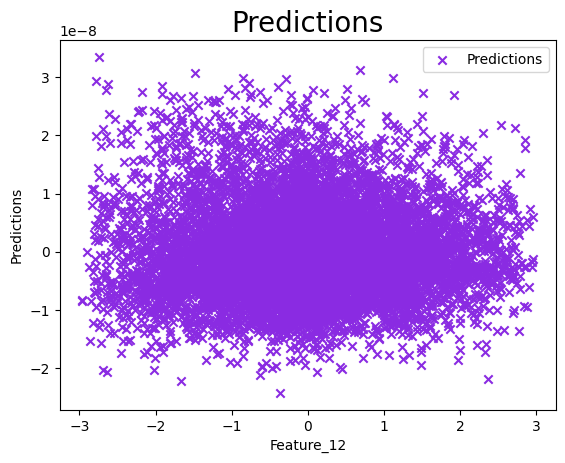

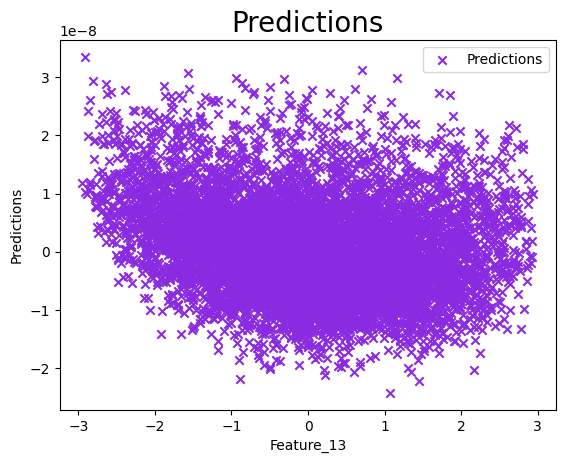

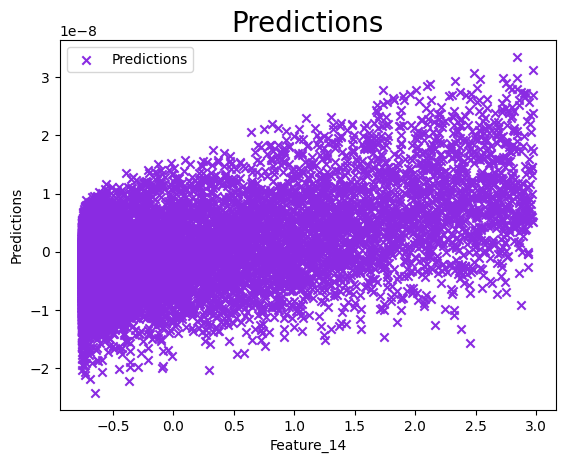

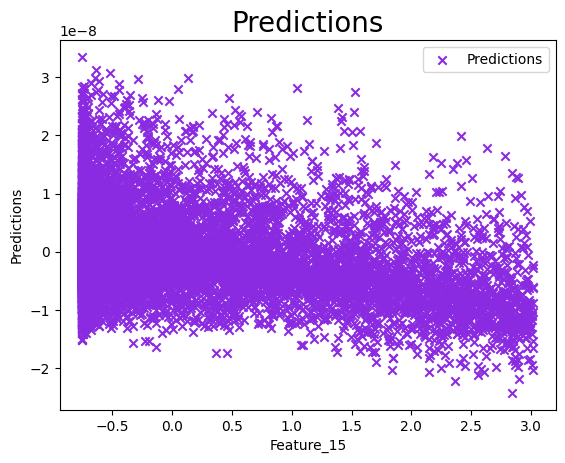

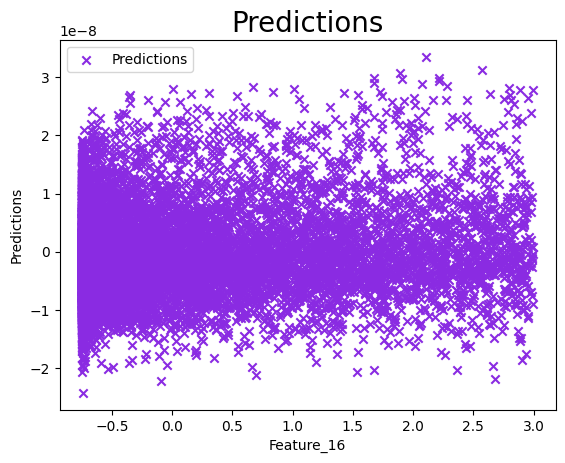

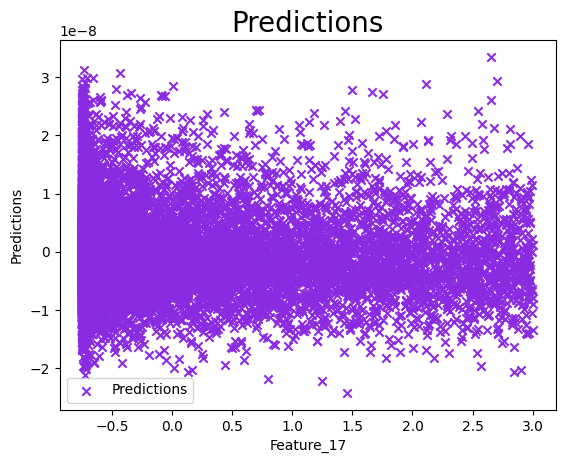

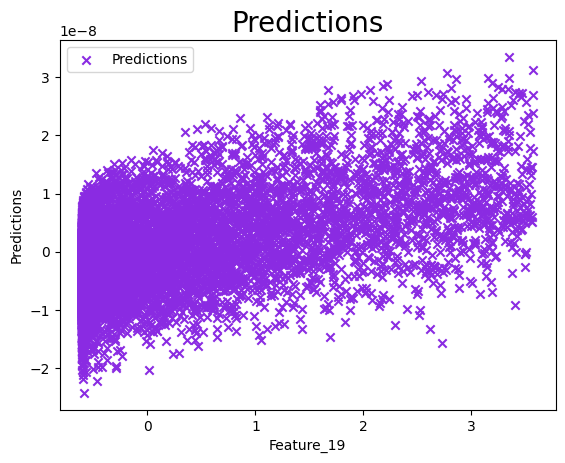

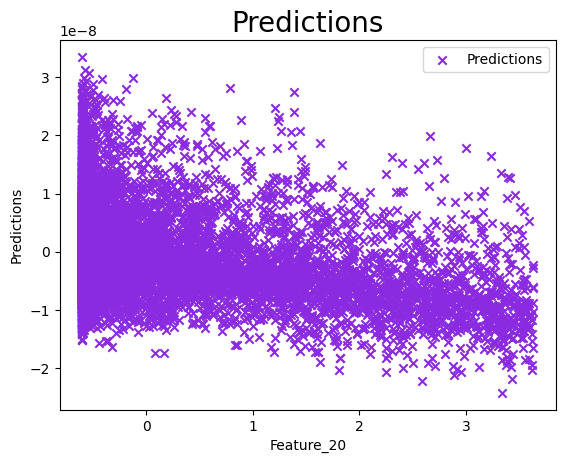

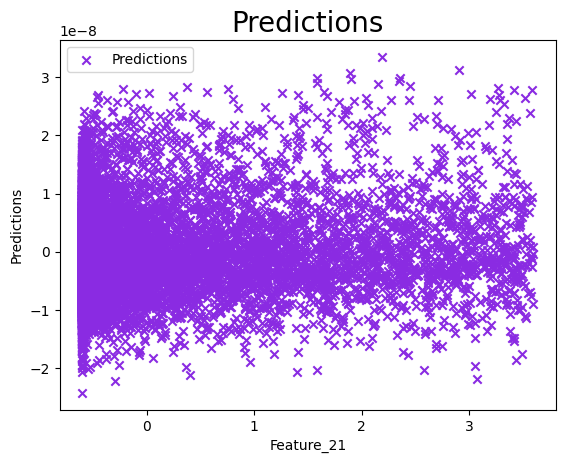

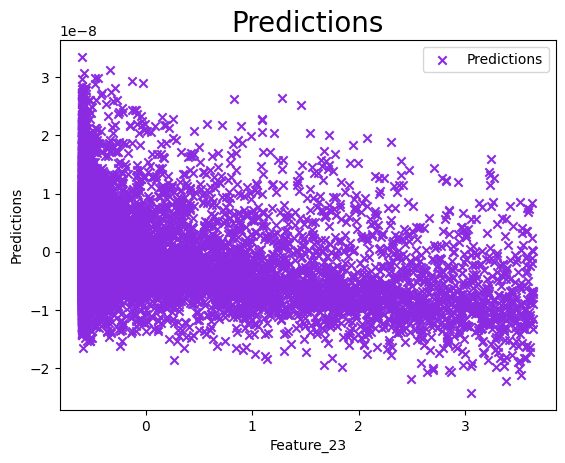

In [ ]:
for i in range(x_test.shape[1]):
  plt.scatter(x_test[:, i], prediction_test_set, marker='x', c='#8A2BE2', label = 'Predictions')

  plt.title('Predictions', fontdict = {'fontsize' : 20})
  plt.ylabel('Predictions')
  plt.xlabel('Feature_' + str(i + 1))

  plt.legend()

  plt.show()

`Saved the prediction in Google Drive`

In [ ]:
#df = pd.DataFrame(prediction_test_set)
#df.columns = ['Prediction_polynomialregression']
#df.to_csv('/content/drive/MyDrive/polynomial_regression_test_prediction.csv', index=False)